In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
try:
    df = pd.read_csv('spotify dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'spotify dataset.csv' not found. Please ensure the file is in the same directory.")
    exit()

# Display the first few rows and information about the dataset
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Drop irrelevant columns for clustering and analysis
# We'll keep 'track_name', 'track_artist', and 'playlist_genre' for later use.
df.drop(['track_id', 'track_album_id', 'track_album_name', 'track_album_release_date',
         'playlist_id', 'playlist_subgenre'], axis=1, inplace=True)

# Handle potential duplicate rows
df.drop_duplicates(inplace=True)
print(f"\nNumber of rows after removing duplicates: {df.shape[0]}")

# Identify numerical and categorical features
numerical_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                      'duration_ms', 'track_popularity']
categorical_features = ['track_name', 'track_artist', 'playlist_name', 'playlist_genre']

--- Step 1: Data Preprocessing ---
Dataset loaded successfully.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-n


--- Step 2: Data Analysis and Visualizations ---

Visualizing distributions of numerical features...


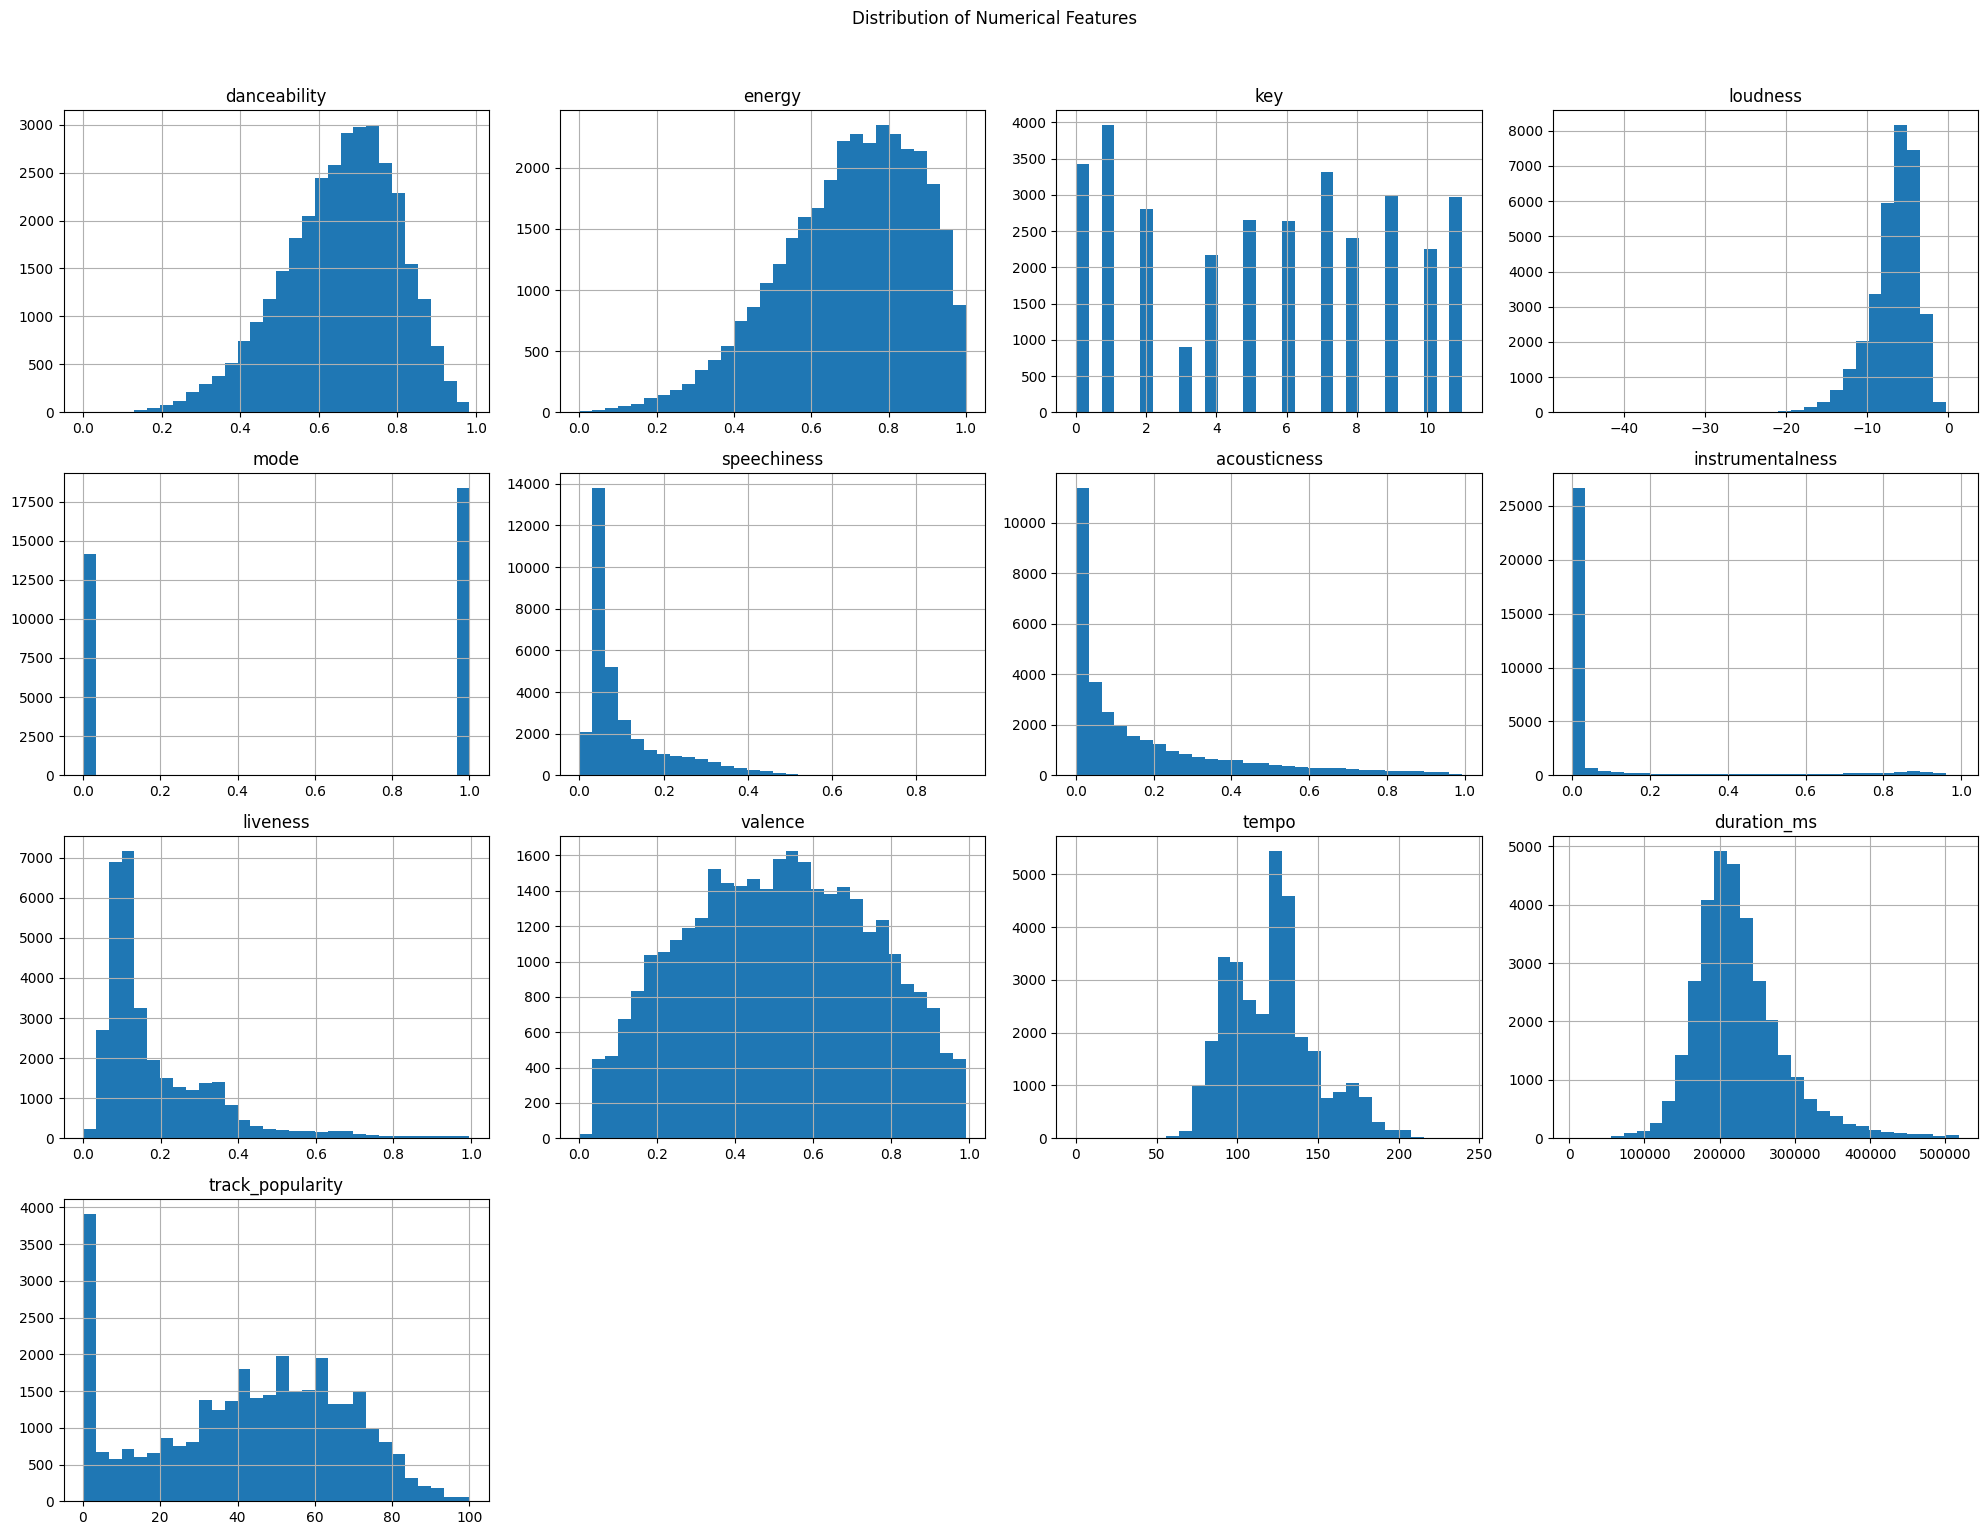


Creating a correlation matrix...


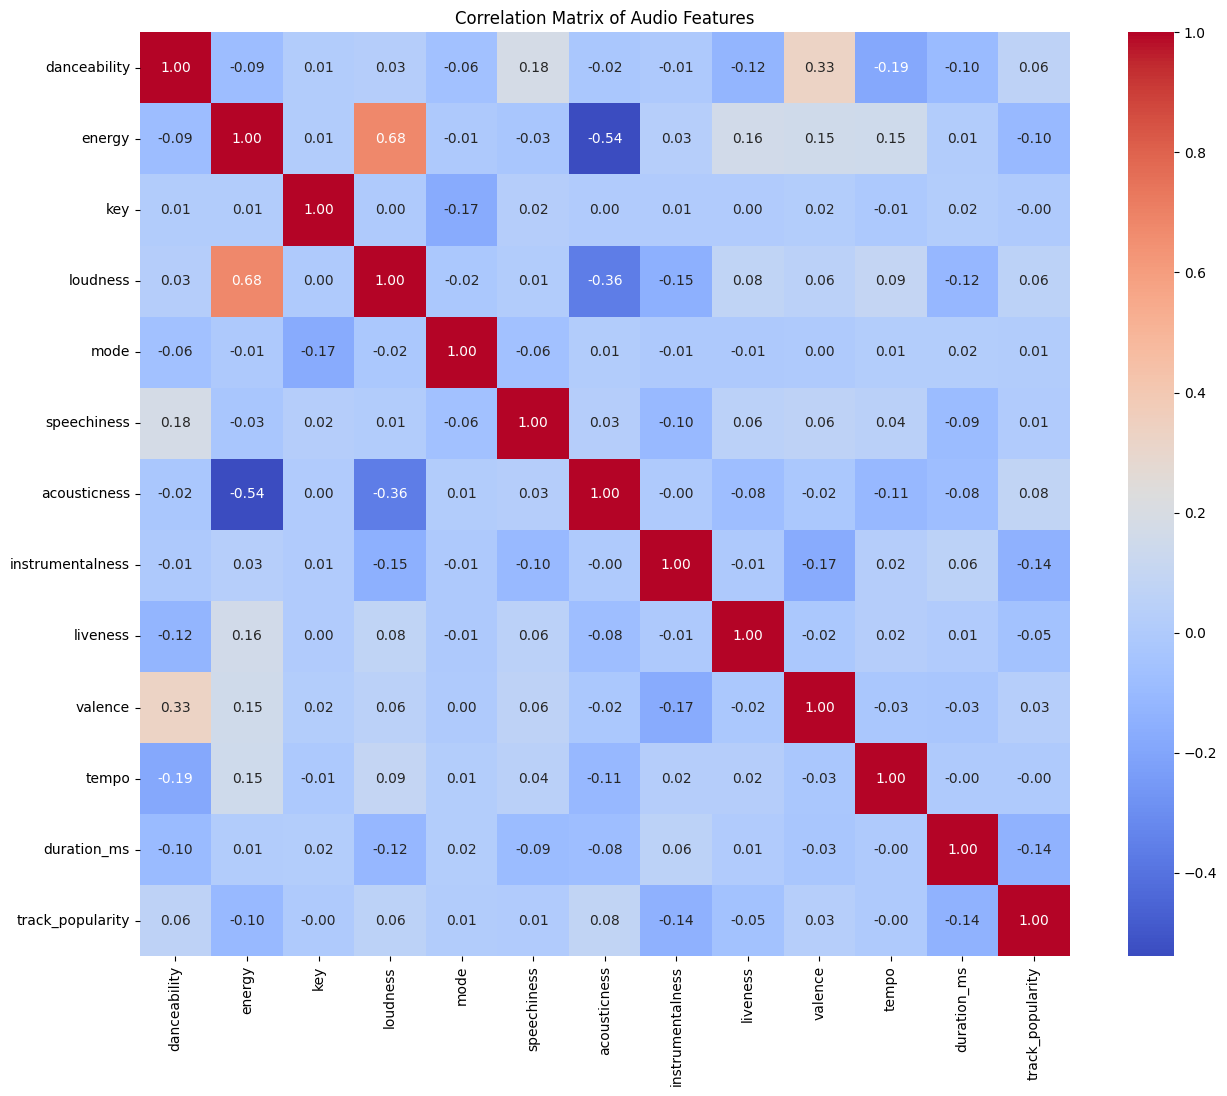

In [2]:
# Distribution of numerical features
print("\nVisualizing distributions of numerical features...")
df[numerical_features].hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

# Correlation Matrix
print("\nCreating a correlation matrix...")
plt.figure(figsize=(15, 12))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Audio Features')
plt.show()

In [3]:
# Select features for clustering. We will use the main audio features.
features_for_clustering = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                           'instrumentalness', 'liveness', 'valence', 'tempo']

X = df[features_for_clustering]

# Scale the data using StandardScaler
print("\nScaling the data...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


--- Step 3: Preparing Data for Clustering ---

Scaling the data...



--- Step 4: Clustering ---
Finding the optimal number of clusters using the Elbow Method...


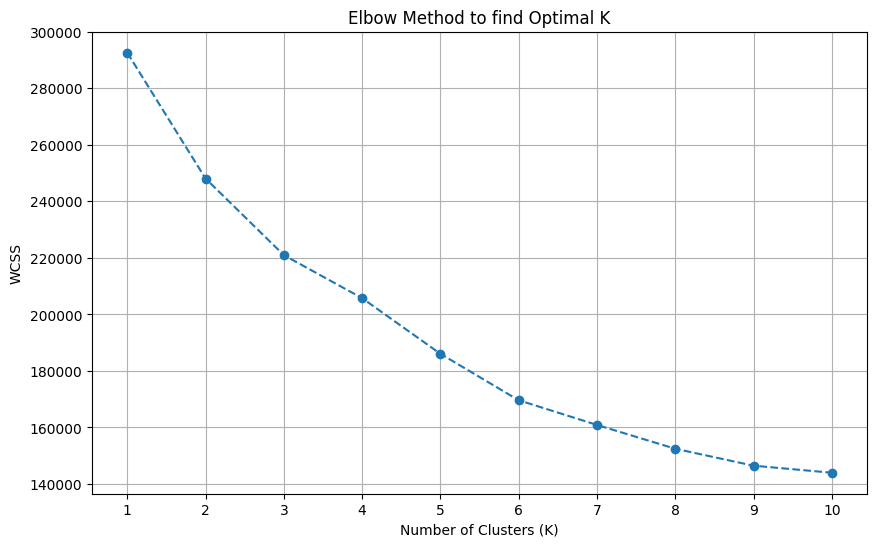


Optimal number of clusters chosen: 4

Size of each cluster:
cluster
3    13458
2    10278
1     5602
0     3172
Name: count, dtype: int64


In [4]:
# Determine the optimal number of clusters using the Elbow Method
print("Finding the optimal number of clusters using the Elbow Method...")
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the elbow plot, you will need to choose the optimal number of clusters.
# For this example, let's assume we choose K=4. You can change this number.
optimal_k = 4
print(f"\nOptimal number of clusters chosen: {optimal_k}")

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_scaled)

# Display the size of each cluster
print("\nSize of each cluster:")
print(df['cluster'].value_counts())



--- Step 5: Analyzing the Clusters ---

Visualizing the clusters using PCA...


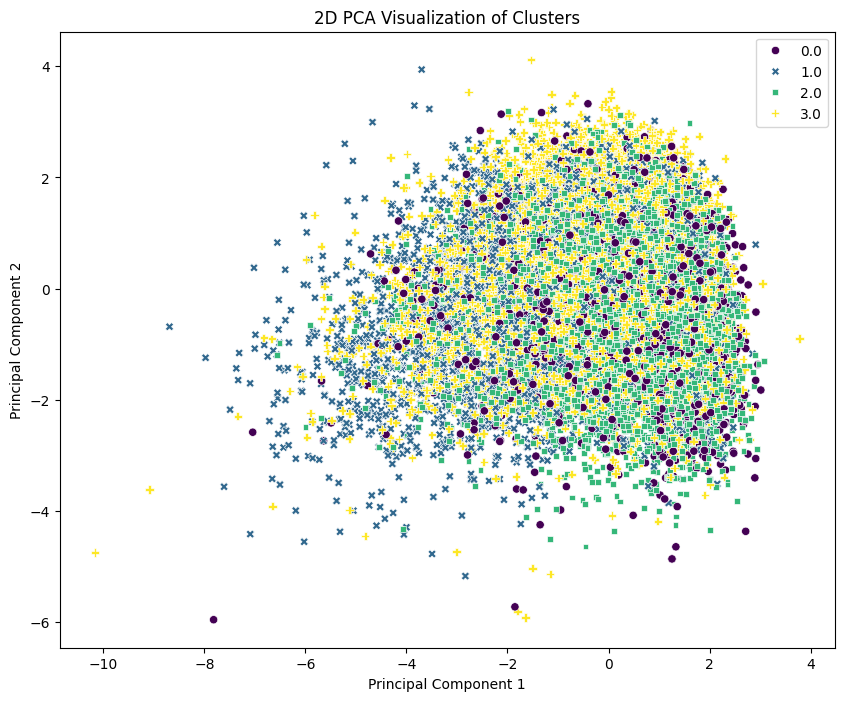


Average feature values for each cluster:
         danceability    energy   loudness  speechiness  acousticness  \
cluster                                                                 
0            0.616367  0.780789  -5.978491     0.136788      0.110330   
1            0.616200  0.438293 -10.438862     0.090002      0.482986   
2            0.564545  0.801961  -5.410646     0.076300      0.062891   
3            0.749309  0.707716  -6.367719     0.131328      0.149970   

         instrumentalness  liveness   valence       tempo  
cluster                                                    
0                0.072448  0.544621  0.513492  122.104500  
1                0.133745  0.147030  0.395769  113.239538  
2                0.136601  0.162862  0.376590  132.036819  
3                0.026064  0.145525  0.662179  115.264007  

--- Songs from Cluster 0 ---
                                           track_name      track_artist  \
8              Tough Love - Tiësto Remix / Radio Edit 

In [5]:
# Visualize the clusters using PCA for 2D representation
print("\nVisualizing the clusters using PCA...")
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = df['cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', style='cluster')
plt.title('2D PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Get the average values of the features for each cluster
cluster_analysis = df.groupby('cluster')[features_for_clustering].mean()
print("\nAverage feature values for each cluster:")
print(cluster_analysis)

# Example: Display a few songs from each cluster
for i in range(optimal_k):
    print(f"\n--- Songs from Cluster {i} ---")
    cluster_songs = df[df['cluster'] == i]
    if not cluster_songs.empty:
        print(cluster_songs[['track_name', 'track_artist', 'playlist_genre']].head(5))
    else:
        print("No songs in this cluster.")

print("\nProject complete. You can now analyze the cluster characteristics.")